# Assignment 1

Idea: how music and the arts matters for mental health. More specifically, we are zooming in to the idea of how it affects social connectedness and helps with preventing isolation.

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Macro Plot

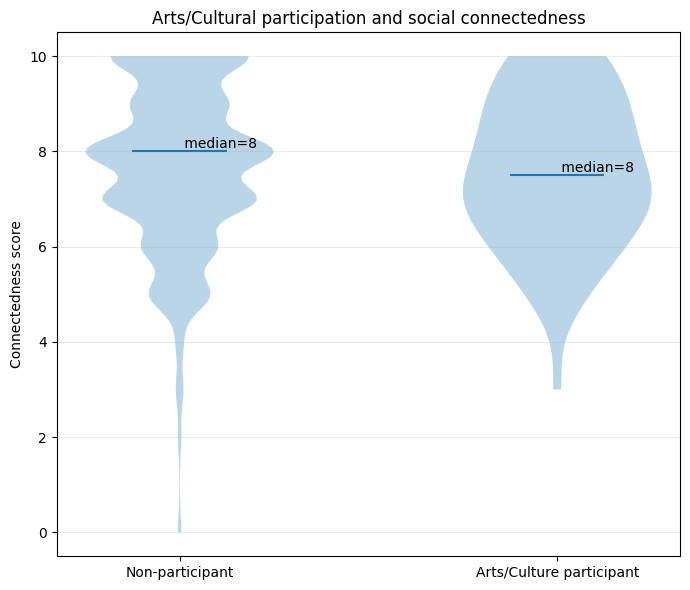

In [8]:
svs = pd.read_csv("data/Social Values Survey data.csv")
svs.columns = [c.strip().lower().replace(" ", "_") for c in svs.columns]

# keep required fields
df = svs[["social_involve_2", "outcome_connection"]].dropna().copy()

# arts participation: yes/no
df["arts_participant"] = (df["social_involve_2"].astype(str).str.strip().str.lower() == "yes")

# change to numeric to be able to plot it out
def to_numeric_score(x):
    s = str(x)
    # grab first integer in the string
    import re
    m = re.search(r"\d+", s)
    return float(m.group()) if m else np.nan

df["connection_score"] = df["outcome_connection"].apply(to_numeric_score)
df = df.dropna(subset=["connection_score"])

# split into two groups
a = df.loc[df["arts_participant"], "connection_score"].values
b = df.loc[~df["arts_participant"], "connection_score"].values

# start plot
fig, ax = plt.subplots(figsize=(7,6))

parts = ax.violinplot([b, a], showmeans=False, showmedians=True, showextrema=False)
ax.set_xticks([1, 2])
ax.set_xticklabels(["Non-participant", "Arts/Culture participant"])

ax.set_ylabel("Connectedness score")
ax.set_title("Arts/Cultural participation and social connectedness")
ax.grid(True, axis="y", alpha=0.25)

# Add clear median labels
med_non = np.median(b) if len(b) else np.nan
med_art = np.median(a) if len(a) else np.nan
ax.text(1, med_non, f" median={med_non:.0f}", va="bottom")
ax.text(2, med_art, f" median={med_art:.0f}", va="bottom")

plt.tight_layout()
plt.show()


In this plot, we see that the non-participants have a longer lower tail while arts/culture participants have a shorter lower tail, with many values congregating at the upper end of the connectedness score. This indicates that the participation in arts/culture activities could be a factor to alleviate the problem of social isolation. Given that social isolation is a risk factor for poor mental health (APA, 1), this plot suggests that participation in arts/culture activites may help in combating the issue of social isolation in Singapore.

## Micro Plot

/var/folders/lh/7rc342j54xnd2xl5w63b9dy00000gn/T/ipykernel_3932/84641554.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vals = np.array([float(prop.loc[False, k]), float(prop.loc[True, k])], dtype=float)


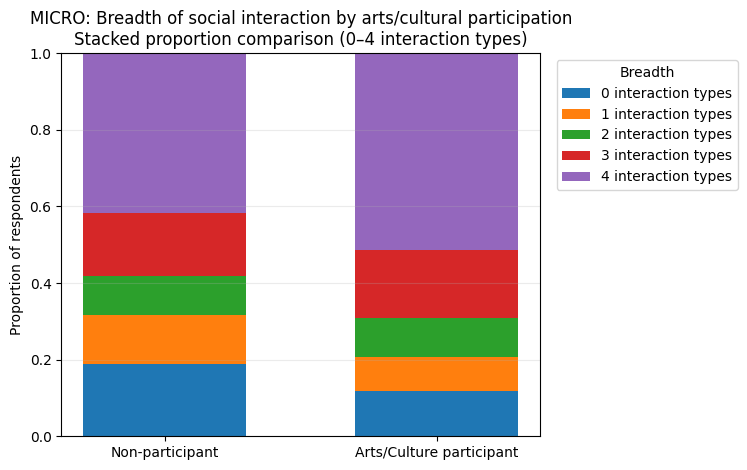

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load SVS data
svs = pd.read_csv("data/Social Values Survey data.csv")
svs.columns = [c.strip().lower().replace(" ", "_") for c in svs.columns]

# Select interaction variables
df = svs[[
    "social_involve_2",
    "sinteract_meal",
    "sinteract_invitedfriend",
    "sinteract_beeninvited",
    "sinteract_participated"
]].dropna().copy()

# Arts/Culture participation flag
df["arts_participant"] = (
    df["social_involve_2"].astype(str).str.strip().str.lower().eq("yes")
)

# Convert Yes/No → 1/0
interact_cols = [
    "sinteract_meal",
    "sinteract_invitedfriend",
    "sinteract_beeninvited",
    "sinteract_participated"
]
for c in interact_cols:
    df[c] = df[c].astype(str).str.strip().str.lower().map({"yes": 1, "no": 0})

df = df.dropna(subset=interact_cols)

# Interaction breadth index (0–4)
df["interaction_breadth"] = df[interact_cols].sum(axis=1).astype(int)

# Proportion table: rows = participant flag, columns = breadth 0..4
prop = (
    df.groupby(["arts_participant", "interaction_breadth"])
      .size()
      .groupby(level=0)
      .apply(lambda x: x / x.sum())
      .unstack(fill_value=0)
)

# Ensure both groups exist and all columns 0..4 exist
for k in range(5):
    if k not in prop.columns:
        prop[k] = 0.0
prop = prop[[0, 1, 2, 3, 4]]

if True not in prop.index:
    prop.loc[True] = 0.0
if False not in prop.index:
    prop.loc[False] = 0.0

# --- Plot ---
labels = ["Non-participant", "Arts/Culture participant"]
x = np.array([0, 1], dtype=float)
bottom = np.zeros(2, dtype=float)

fig, ax = plt.subplots(figsize=(7.6, 4.8))

for k in prop.columns:
    vals = np.array([float(prop.loc[False, k]), float(prop.loc[True, k])], dtype=float)
    ax.bar(x, vals, bottom=bottom, width=0.6, label=f"{k} interaction types")
    bottom = bottom + vals

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel("Proportion of respondents")
ax.set_title(
    "MICRO: Breadth of social interaction by arts/cultural participation\n"
    "Stacked proportion comparison (0–4 interaction types)"
)
ax.grid(axis="y", alpha=0.25)
ax.legend(title="Breadth", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=True)

plt.tight_layout()
plt.show()


## Citations

1. https://www.apa.org/monitor/2019/05/ce-corner-isolation